# Introduction to Machine Learning

By the end of this week, students will:

Understand what machine learning (ML) is and where it’s used.

Learn the difference between supervised and unsupervised learning.

Use scikit-learn to run a simple prediction model.

Interpret ML results in plain language.

# What is Machine Learning?

#  How ML Works (Simplified)

#  Types of ML

# Simple Prediction with scikit-learn

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Data
df = pd.DataFrame({
    "Size": [1500, 1800, 2400],
    "Bedrooms": [3, 4, 4],
    "Price": [200000, 250000, 300000]
})

# Train
X = df[["Size", "Bedrooms"]]
y = df["Price"]

model = LinearRegression()
model.fit(X, y)

# Predict
new_house = [[2000, 3]]
print(model.predict(new_house))

[241666.66666667]


C:\Users\Woon\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


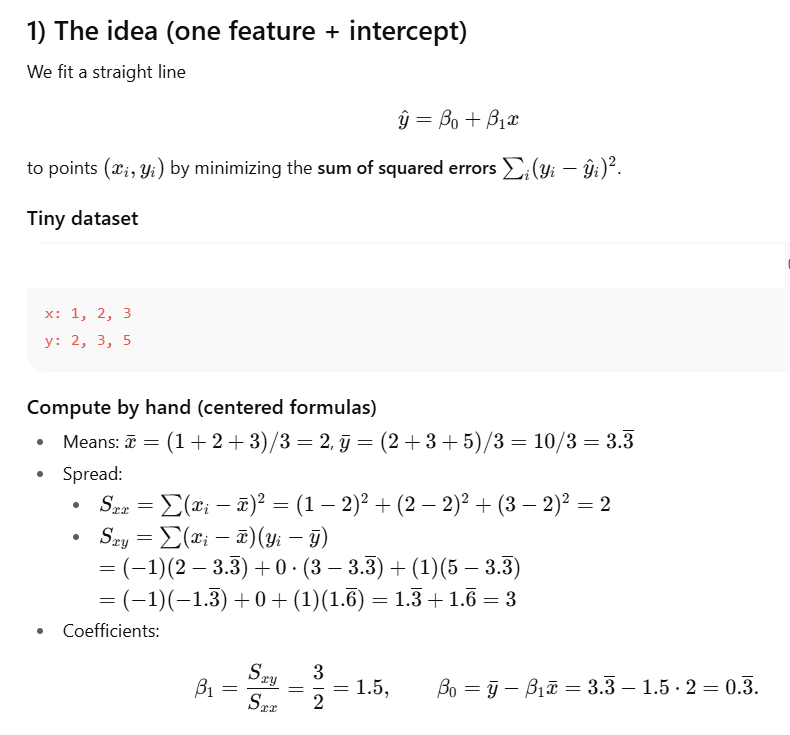

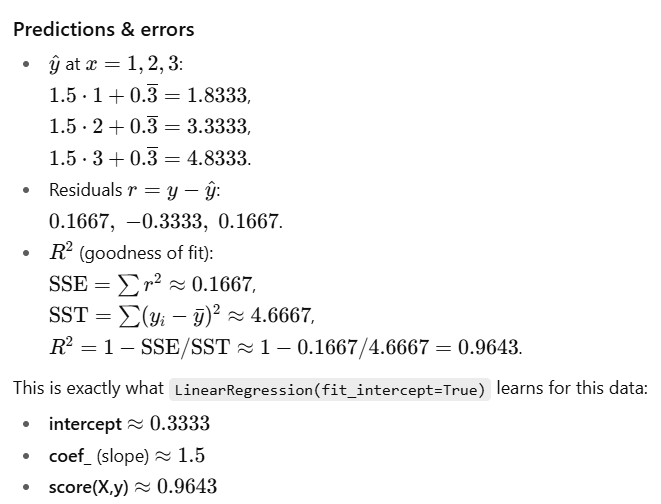

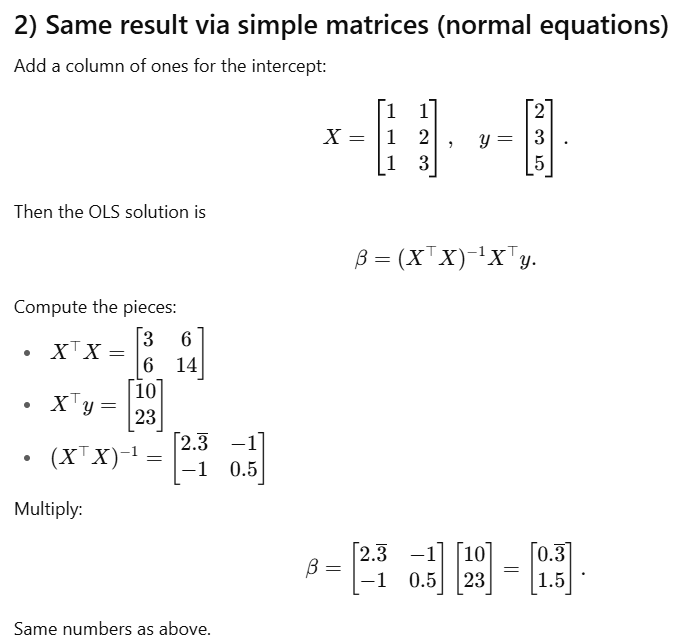

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[1.0],[2.0],[3.0]])
y = np.array([2.0, 3.0, 5.0])

# With intercept (recommended)
m = LinearRegression(fit_intercept=True)
m.fit(X, y)
print("coef_ (slope):", m.coef_[0])        # ~ 1.5
print("intercept_   :", m.intercept_)       # ~ 0.3333
print("R^2          :", m.score(X, y))      # ~ 0.9643

# Without intercept (not recommended here)
m0 = LinearRegression(fit_intercept=False)
m0.fit(X, y)
print("coef_ (slope, no intercept):", m0.coef_[0])   # ~ 1.6429
print("R^2 (no intercept)         :", m0.score(X,y)) # ~ 0.9541


coef_ (slope): 1.4999999999999998
intercept_   : 0.3333333333333339
R^2          : 0.9642857142857143
coef_ (slope, no intercept): 1.6428571428571423
R^2 (no intercept)         : 0.9540816326530612


# Classification Example (Iris Dataset)

In [2]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

print(model.predict([[5.1, 3.5, 1.4, 0.2]]))

[0]


# Evaluating Accuracy

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.9333333333333333


# In-Class Activity

# Common Mistakes

# Key Takeaways

# Homework